In [14]:
!pip install geopandas

# Projet TD 9/10
## Data Initialisation

In [15]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [16]:
df = pd.read_csv("/content/gdrive/MyDrive/ESILV/IA/valeursfoncieres-2021.txt",sep="|")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18,23,24,25,26,27,28,29,30,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,97.0,5.0,S,NaN,2410.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,2410.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,530.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,88.0,4.0,S,NaN,866.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,168.0,5.0,S,NaN,1426.0


In [17]:
df.shape

(3379232, 43)

## Remove non- usable columns 

In [18]:
nbcolumn=df.shape[0]
prc_Nan=0.75
max_number_of_nas = nbcolumn * prc_Nan
dfclean = df.loc[:, (df.isnull().sum(axis=0) <= max_number_of_nas)]
dfclean.shape

(3379232, 22)

In [19]:
dfclean.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Section,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,05/01/2021,Vente,"185000,00",5080.0,CHE,0471,DE VOGELAS,1370.0,VAL-REVERMONT,...,ZC,122,NaN,0,1.0,Maison,97.0,5.0,S,2410.0
1,1,05/01/2021,Vente,"185000,00",5080.0,CHE,0471,DE VOGELAS,1370.0,VAL-REVERMONT,...,ZC,122,NaN,0,3.0,Dépendance,0.0,0.0,S,2410.0
2,1,06/01/2021,Vente,"10,00",NaN,NaN,B043,ROUGEMONT,1290.0,BEY,...,A,204,NaN,0,NaN,NaN,NaN,NaN,BT,530.0
3,1,04/01/2021,Vente,"204332,00",7.0,ALL,0276,DES ECUREUILS,1310.0,BUELLAS,...,B,1325,NaN,0,1.0,Maison,88.0,4.0,S,866.0
4,1,06/01/2021,Vente,"320000,00",87.0,RTE,0140,DE CERTINES,1250.0,MONTAGNAT,...,AZ,11,NaN,0,1.0,Maison,168.0,5.0,S,1426.0


## Clean Valeur fonciere

In [20]:
dfclean["Valeur fonciere"]=dfclean["Valeur fonciere"].replace(',','.',regex=True).astype(float)
dfclean["Valeur fonciere"].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('float64')

## Test Nombre prix/departements

In [21]:
dfclean["prix/m^2"] = dfclean["Valeur fonciere"] / dfclean["Surface reelle bati"]
dfclean["prix/m^2"] = dfclean["prix/m^2"].apply(lambda x: x if x!=np.inf else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
tmp = dfclean.groupby('Code departement').mean().reset_index()
list_prixSurface = [tmp["Code departement"] , tmp["prix/m^2"]]
header = ["departement" , "prix/m^2"]
df_prixSurface = pd.concat(list_prixSurface, axis=1, keys=header)

df_prixSurface = df_prixSurface.drop([91,92,93,94,95,98,49,37])
df_prixSurface["departement"]=df_prixSurface["departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))
df_new_line = pd.DataFrame([['67',np.nan] , ['68',np.nan] , ['57',np.nan], ['49',np.nan],[37,np.nan]] , columns=['departement','prix/m^2'])
df_prixSurface = pd.concat([df_prixSurface , df_new_line] , ignore_index=True)
df_prixSurface

,departement,prix/m^2
0,01,2272.310748
1,02,1440.310648
2,03,6816.714815
3,04,2574.400382
4,05,1934.708641
...,...,...
91,67,NaN
92,68,NaN
93,57,NaN
94,49,NaN


In [23]:
geo= gpd.read_file('https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson')

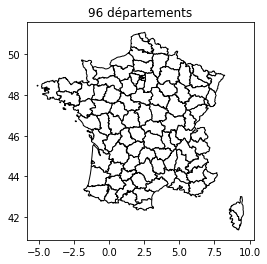

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
geo.plot(ax=ax, color='white', edgecolor='black')
codes = [_ for _ in set(geo.code) if len(_) < 3]
metropole = geo[geo.code.isin(codes)]
ax.set_title("%s départements" % metropole.shape[0]);
metropole
Paris= metropole.drop(metropole[(metropole.code!="75") & (metropole.code!="77") & (metropole.code!="78") & (metropole.code!="91") & (metropole.code!="92") & (metropole.code!="93") & (metropole.code!="94") & (metropole.code!="95")].index)
RhoneAlpes = metropole.drop(metropole[(metropole.code!="03") & (metropole.code!="42") & (metropole.code!="69") & (metropole.code!="01") & (metropole.code!="74") & (metropole.code!="63") & (metropole.code!="43") & (metropole.code!="15") & (metropole.code!="07")& (metropole.code!="26")& (metropole.code!="38")& (metropole.code!="73")].index)

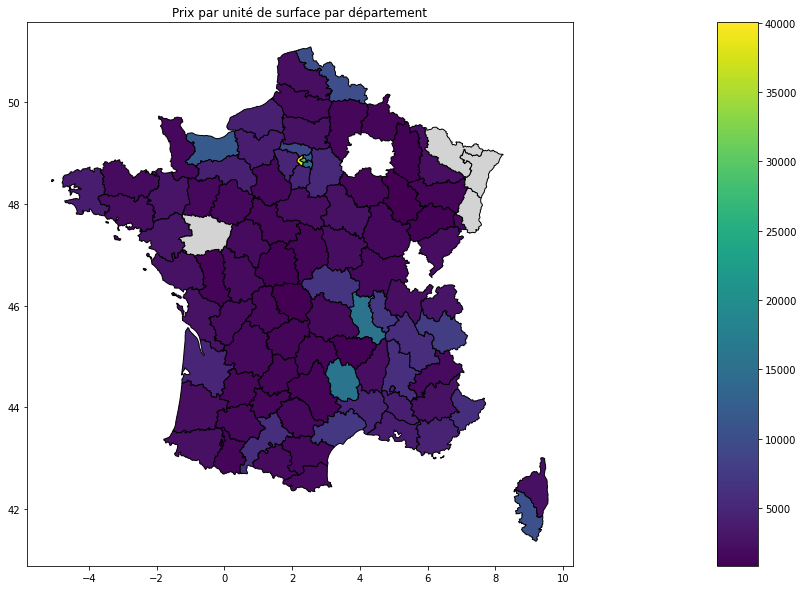

In [25]:
merged =  df_prixSurface.reset_index(drop=False).merge(metropole, left_on="departement", right_on="code")
merged.shape
geomerged = gpd.GeoDataFrame(merged)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)

geomerged.plot(column="prix/m^2", ax=ax, edgecolor='black', legend=True, cax=cax,missing_kwds={'color': 'lightgrey'})
ax.set_title("Prix par unité de surface par département");

## Nombre de ventes par departement

In [26]:
#creation table
dfclean["compte"]=1
tmp2=dfclean.groupby('Code departement').sum().reset_index()
list_departement_nbventes=[tmp2["Code departement"],tmp2["compte"]]
header=["departement","nombre de ventes"]
df_nbventes=pd.concat(list_departement_nbventes, axis=1, keys=header)

#clean table
df_nbventes=df_nbventes.drop([91,92,93,94,95,98])
df_nbventes["departement"]=df_nbventes["departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))
df_new_line = pd.DataFrame([['67',np.nan],['68',np.nan],['57',np.nan]], columns=['departement','nombre de ventes'])
df_nbventes = pd.concat([df_nbventes,df_new_line], ignore_index=True)
#df_nbventes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


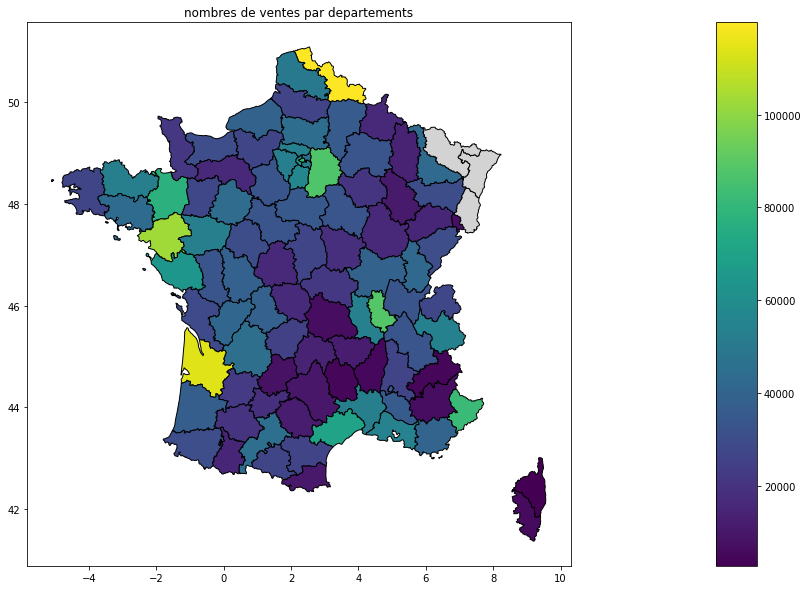

In [27]:
merged2 =  df_nbventes.reset_index(drop=False).merge(metropole, left_on="departement", right_on="code")
merged2.shape
geomergedNbVentes = gpd.GeoDataFrame(merged2)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)

geomergedNbVentes.plot(column="nombre de ventes", ax=ax, edgecolor='black', legend=True, cax=cax,missing_kwds={'color': 'lightgrey'})
ax.set_title("nombres de ventes par departements");

## Prix Surface sur Ile de france

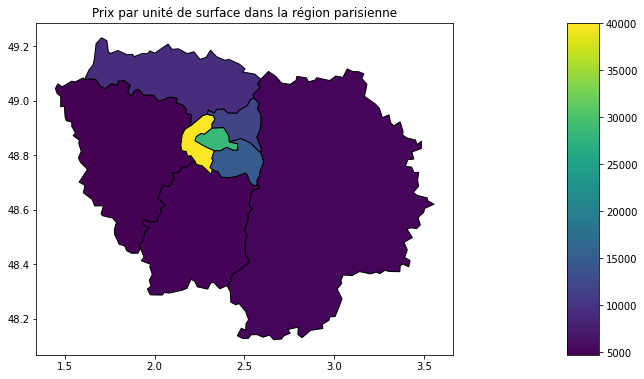

In [28]:
dfIleDeFrance = dfclean[ (dfclean['Code departement'] == 75) | (dfclean['Code departement'] == 77) | (dfclean['Code departement'] == 78) | (dfclean['Code departement'] == 91) 
                          | (dfclean['Code departement'] == 95) | (dfclean['Code departement'] == 94) | (dfclean['Code departement'] == 93) | (dfclean['Code departement'] == 92) 
                          | (dfclean['Code departement'] == 75)]
                          
dfIleDeFranceP = dfIleDeFrance.groupby('Code departement').mean().reset_index()
dfIleDeFranceP["Code departement"]=dfIleDeFranceP["Code departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))

merdgeParis = dfIleDeFranceP.reset_index(drop=False).merge(Paris, left_on="Code departement", right_on="code")
merdgeParis.shape

geomergedParis = gpd.GeoDataFrame(merdgeParis)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)

geomergedParis.plot(column="prix/m^2", ax=ax, edgecolor='black', legend=True, cax=cax)
ax.set_title("Prix par unité de surface dans la région parisienne");

## Nombre de ventes Ile de france


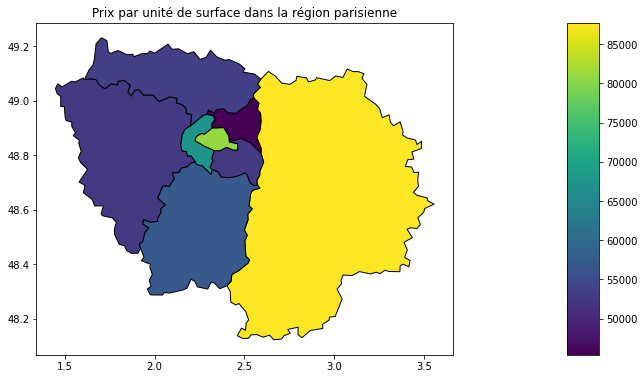

In [29]:
dfIleDeFranceN = dfIleDeFrance.groupby('Code departement').sum().reset_index()
dfIleDeFranceN["Code departement"]=dfIleDeFranceN["Code departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))

merdgeParis = dfIleDeFranceN.reset_index(drop=False).merge(Paris, left_on="Code departement", right_on="code")
merdgeParis.shape

geomergedParis = gpd.GeoDataFrame(merdgeParis)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)

geomergedParis.plot(column="compte", ax=ax, edgecolor='black', legend=True, cax=cax)
ax.set_title("Prix par unité de surface dans la région parisienne");

## Nombre de vente Rhone

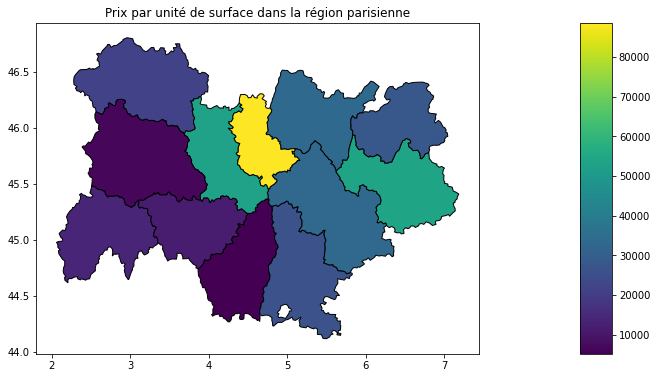

In [30]:
dfRhoneAlpes = dfclean[ (dfclean['Code departement'] == 3) | (dfclean['Code departement'] == 42) | (dfclean['Code departement'] == 69) | (dfclean['Code departement'] == 1) 
                          | (dfclean['Code departement'] == 74) | (dfclean['Code departement'] == 63) | (dfclean['Code departement'] == 43) | (dfclean['Code departement'] == 15) 
                          | (dfclean['Code departement'] == 7) | (dfclean['Code departement'] == 26) | (dfclean['Code departement'] == 38) | (dfclean['Code departement'] == 73)]
dfRhoneAlpes = dfRhoneAlpes.groupby('Code departement').sum().reset_index()
dfRhoneAlpes["Code departement"] = dfRhoneAlpes["Code departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))

merdgeRA = dfRhoneAlpes.reset_index(drop=False).merge(RhoneAlpes, left_on="Code departement", right_on="code")
merdgeRA.shape

geomergedRA = gpd.GeoDataFrame(merdgeRA)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)

geomergedRA.plot(column="compte", ax=ax, edgecolor='black', legend=True, cax=cax)
ax.set_title("Prix par unité de surface dans la région parisienne");

## 2020 part

In [31]:
df2 = pd.read_csv("/content/gdrive/MyDrive/ESILV/IA/valeursfoncieres-2020.txt",sep="|")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
nbcolumn=df2.shape[0]
prc_Nan=0.75
max_number_of_nas = nbcolumn * prc_Nan
dfclean2 = df2.loc[:, (df2.isnull().sum(axis=0) <= max_number_of_nas)]
dfclean2["Valeur fonciere"]=dfclean2["Valeur fonciere"].replace(',','.',regex=True).astype(float)
dfclean2["Valeur fonciere"].dtype
dfclean2["prix/m^2"] = dfclean2["Valeur fonciere"] / dfclean2["Surface reelle bati"]
dfclean2["prix/m^2"] = dfclean2["prix/m^2"].apply(lambda x: x if x!=np.inf else 0)
dfclean2['compte'] = 1
#dfIleDeFranceP2["Code departement"] = dfIleDeFranceP2["Code departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

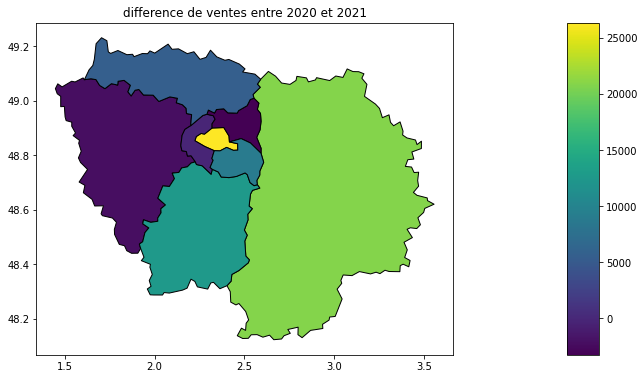

In [57]:
dfnb2 = dfclean2.groupby('Code departement').sum().reset_index()
dfnb2['test'] = tmp2['compte'] - dfnb2['compte']

dfnb2["Code departement"]=dfnb2["Code departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))

merdgeParisd = dfnb2.reset_index(drop=False).merge(Paris, left_on="Code departement", right_on="code")
merdgeParisd.shape

geomergedParisd = gpd.GeoDataFrame(merdgeParisd)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)

geomergedParisd.plot(column="test", ax=ax, edgecolor='black', legend=True, cax=cax)
ax.set_title("difference de ventes entre 2020 et 2021");

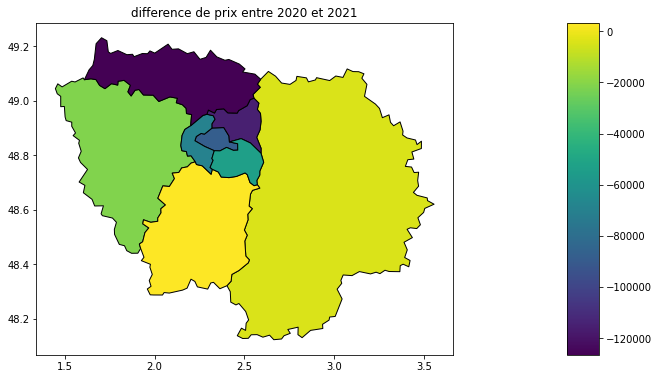

In [59]:
dfnb2 = dfclean2.groupby('Code departement').mean().reset_index()
dfnb2['test'] = df_prixSurface['prix/m^2'] - dfnb2['prix/m^2']

dfnb2["Code departement"]=dfnb2["Code departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))

merdgeParisd = dfnb2.reset_index(drop=False).merge(Paris, left_on="Code departement", right_on="code")
merdgeParisd.shape

geomergedParisd = gpd.GeoDataFrame(merdgeParisd)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)

geomergedParisd.plot(column="test", ax=ax, edgecolor='black', legend=True, cax=cax)
ax.set_title("difference de prix entre 2020 et 2021");